In [1]:
import math
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# exact solution u(x) for pde
def func_u(x):
    u=(1-(x[:,0]**2)-(x[:,1]**2))/4
    return u 

# f(x) = 1
def func_f(x):
    lens=x.shape[0]
    f=torch.Tensor(lens,1)
    for i in range(lens):
      f[i] = 1
    return (f)

def func_g(x):
    lens=x.shape[0]
    g=torch.Tensor(lens,1)
    for i in range(lens):
      g[i] = 0
    return (g)

# w_val
def func_w(x):
    lens = x.shape[0]
    w_bool = torch.ge(torch.zeros(lens), 1-x[:,0]**2-x[:,1]**2)
    w_val = torch.where(w_bool, torch.zeros(lens), 1-x[:,0]**2-x[:,1]**2)
    return (w_val)



# define generator and discriminator neural network
class generator(torch.nn.Module):
    def __init__(self):
        super(generator,self).__init__()
        self.hidden00=torch.nn.Linear(dim, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden00.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        #torch.nn.init.constant(self.hidden00.bias, -0.5)
        self.hidden0=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden0.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden1=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden1.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden2=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden2.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden3=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden3.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden4=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden4.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden5=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden5.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden6=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden6.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.predict=torch.nn.Linear(u_hidden_size, out_size)
        torch.nn.init.kaiming_uniform_(self.predict.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        
    def forward(self, x):
        x=F.leaky_relu(self.hidden00(x))
        x=F.leaky_relu(self.hidden0(x))
        x=F.leaky_relu(self.hidden1(x))
        x=F.leaky_relu(self.hidden2(x))
        x=F.leaky_relu(self.hidden3(x))
        x=F.leaky_relu(self.hidden4(x))
        x=F.leaky_relu(self.hidden5(x))
        x=F.leaky_relu(self.hidden6(x))
        x=self.predict(x)
        return(x)

    def backward(self, retain_graph=True):
        self.loss.backward(retain_graph=retain_graph)
        return(self.loss)

class discriminator(torch.nn.Module):
    def __init__(self):
        super(discriminator,self).__init__()
        self.hidden00_v=torch.nn.Linear(dim, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden00_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden0_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden0_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden1_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden1_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden2_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden2_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden3_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden3_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden4_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden4_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden5_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden5_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden6_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden6_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.predict_v=torch.nn.Linear(v_hidden_size, out_size)
        torch.nn.init.kaiming_uniform_(self.predict_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        
    def forward(self, x):
        x=F.leaky_relu(self.hidden00_v(x))
        x=F.leaky_relu(self.hidden0_v(x))
        x=F.leaky_relu(self.hidden1_v(x))
        x=F.leaky_relu(self.hidden2_v(x))
        x=F.leaky_relu(self.hidden3_v(x))
        x=F.leaky_relu(self.hidden4_v(x))
        x=F.leaky_relu(self.hidden5_v(x))
        x=F.leaky_relu(self.hidden6_v(x))
        x=self.predict_v(x)
        return(x)

    def backward(self, retain_graph=True):
        self.loss.backward(retain_graph=retain_graph)
        return(self.loss)



# grad_u
def grad_u(y_output_u):
    optimizer_u_0.zero_grad()
    lens = x_test.shape[0]
    y_output_u.backward(torch.ones([lens,1]), retain_graph=True)
    grad_u = x_test_.grad
    return(grad_u)  

# grad_phi
def grad_phi(y_output_v):
    optimizer_v_0.zero_grad()
    lens = x_test.shape[0]
    w = torch.reshape(func_w(x_test_), (lens, 1))
    phi = y_output_v.mul(w)
    y_output_v.backward(torch.ones([lens, 1]), retain_graph=True)
    grad_phi = x_test_.grad
    return (grad_phi)



# loss function
def I(y_output_u, y_output_v):
    temp_grad_u=grad_u(y_output_u)
    t1 = grad_u(y_output_u)*torch.sum(grad_phi(y_output_v))
    t = func_f(x_test).mul(y_output_v)
    I_0 = t1-t
    lens = x_test.shape[0]
    x_test_1 = torch.Tensor(lens,1)
    for i in range(lens-1):
      x_test_1[0] = 0
      x_test_1[i+1] = x_test[i,1]
    I_1 = I_0.mul(x_test-x_test_1)
    I = torch.sum(I_1)
    return(I)

def L_int(y_output_u, y_output_v):
    numerator = torch.log(torch.abs(I(y_output_u, y_output_v)**2))
    lens = x_test.shape[0]
    x_test_1 = torch.Tensor(lens,1)
    for i in range(lens-1):
      x_test_1[0] = 0
      x_test_1[i+1] = x_test[i,1]
    phi_ = (y_output_v**2).mul(x_test-x_test_1)
    denominator = torch.log(torch.abs(torch.sum(phi_)))
    ratio = numerator-denominator
    return(ratio)

def L_bd():
    result = torch.mean((net_u(x_boundary_)-func_g(x_boundary))**2)
    return(result)

def Loss_u(y_output_u, y_output_v):
    return(L_int(y_output_u, y_output_v)+alpha*L_bd())

def Loss_v(y_output_u,y_output_v):
    return(-L_int(y_output_u, y_output_v))


In [25]:
# initial parameters(modified***)
up= 1.0
low= -1
dim= 2
mesh_size= 50
bound_size= 500
#
v_layer= 6
v_hidden_size= 20
v_step= 1       
v_rate=0.00015   
u_layer= 6
u_hidden_size= 20
u_step= 1
u_rate=0.00015
out_size=1
alpha=25



# x value in domain and boundary
# x_boundary
x_boundary_list=[]  #x_boundry
x_bound_1 = torch.Tensor(bound_size,1).uniform_(low,up)
x_bound_2 = torch.sqrt(1-x_bound_1**2)
x_bound_3 = -torch.sqrt(1-x_bound_1**2)
x_bound_4 = torch.Tensor(bound_size,1).uniform_(low,up)
x_bound_5 = torch.sqrt(1-x_bound_4**2)
x_bound_6 = -torch.sqrt(1-x_bound_4**2)
#
x_boundary_list.append(torch.cat((x_bound_1,x_bound_2),1))
x_boundary_list.append(torch.cat((x_bound_1,x_bound_3),1))
x_boundary_list.append(torch.cat((x_bound_5,x_bound_4),1))
x_boundary_list.append(torch.cat((x_bound_6,x_bound_4),1))
x_boundary = torch.cat((x_boundary_list[0],x_boundary_list[1], x_boundary_list[2], x_boundary_list[3]),0)

# x value for network input
x_mesh = torch.linspace(low,up,mesh_size)
y_mesh=torch.Tensor(mesh_size,mesh_size)
for i in range(mesh_size):
    neg=-torch.sqrt(1-x_mesh[i]**2)
    pos=torch.sqrt(1-x_mesh[i]**2)
    y_mesh[i,:]=torch.linspace(neg.data.float(),pos.data.float(),mesh_size)
mesh1,mesh2=torch.meshgrid(x_mesh,x_mesh)
x_mesh_=torch.reshape(mesh1,(-1,1))
y_mesh_=torch.reshape(y_mesh,(-1,1))
x_test=torch.cat((x_mesh_,y_mesh_),1)


# torch variables
x_test_ = Variable(x_test)
x_test_.requires_grad_(True)
x_boundary_ = Variable(x_boundary)
u_test = func_u(x_test)
u_test_ = Variable(u_test)


# neural network models
net_u= generator()
net_v=discriminator()

# optimizers for grad_u and grad_phi
optimizer_u_0 = torch.optim.SGD(net_u.parameters(), lr = 0)
optimizer_v_0 = torch.optim.SGD(net_v.parameters(), lr = 0)

#optimizers for WAN
optimizer_u = torch.optim.Adam(net_u.parameters(), lr = u_rate) 
optimizer_v = torch.optim.Adam(net_v.parameters(), lr = v_rate)
# learning rate decays when loss doesn't change in 10 iterations
#scheduler_u = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_u, mode='max', factor=0.6, patience=150, verbose=False, threshold=1e-04, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
#scheduler_v = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_v, mode='min', factor=0.6, patience=150, verbose=False, threshold=1e-04, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

#scheduler_u=torch.optim.lr_scheduler.StepLR(optimizer_u, step_size=600, gamma=0.6, last_epoch=-1)  #每一个iteration实际是20个epoch
#scheduler_v=torch.optim.lr_scheduler.StepLR(optimizer_v, step_size=600, gamma=0.6, last_epoch=-1)

In [27]:
iteration = 401
n1 = 10
n2 = 10

prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u, prediction_v)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u = net_u(x_test_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u,prediction_v)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v = net_v(x_test_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(42.1474, grad_fn=<AddBackward0>) tensor(-42.2746, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(47.0064, grad_fn=<AddBackward0>) tensor(-44.5218, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(43.5108, grad_fn=<AddBackward0>) tensor(-43.5107, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(44.5451, grad_fn=<AddBackward0>) tensor(-44.6244, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(45.9617, grad_fn=<AddBackward0>) tensor(-46.1101, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(46.3121, grad_fn=<AddBackward0>) tensor(-46.3491, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(47.3309, grad_fn=<AddBackward0>) tensor(-47.4526, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(49.6337, grad_fn=<AddBackward0>) tensor(-49.4798, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

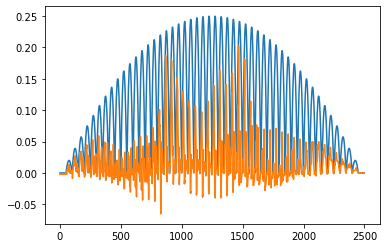

In [28]:
plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

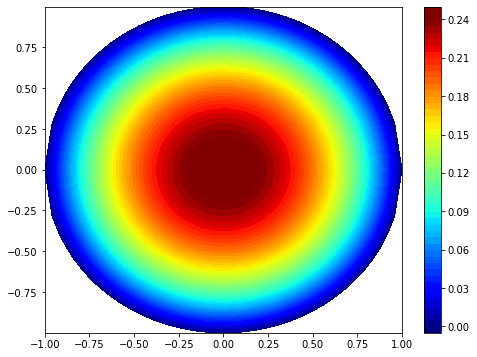

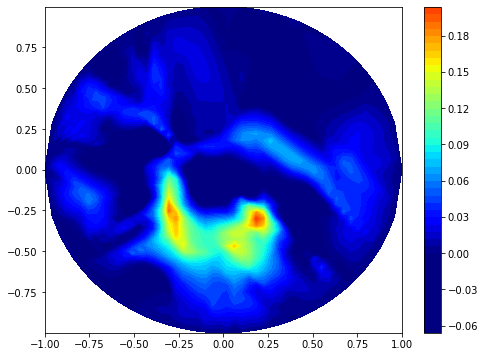

In [29]:
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [30]:
iteration = 301
n1 = 10
n2 = 10

prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u, prediction_v)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u = net_u(x_test_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u,prediction_v)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v = net_v(x_test_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(55.5703, grad_fn=<AddBackward0>) tensor(-56.3785, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(54.9675, grad_fn=<AddBackward0>) tensor(-55.1853, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(54.4208, grad_fn=<AddBackward0>) tensor(-54.4533, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(55.0099, grad_fn=<AddBackward0>) tensor(-55.1271, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(56.0148, grad_fn=<AddBackward0>) tensor(-58.9759, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(55.3156, grad_fn=<AddBackward0>) tensor(-56.3235, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(54.1534, grad_fn=<AddBackward0>) tensor(-54.0325, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(54.5070, grad_fn=<AddBackward0>) tensor(-54.6051, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

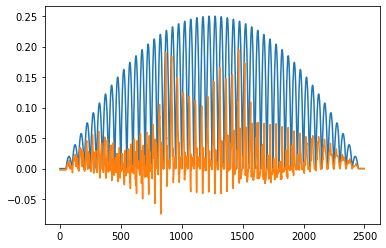

In [31]:
plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

In [32]:
iteration = 501
n1 = 10
n2 = 10

prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u, prediction_v)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u = net_u(x_test_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u,prediction_v)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v = net_v(x_test_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(56.2101, grad_fn=<AddBackward0>) tensor(-55.4027, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(56.1357, grad_fn=<AddBackward0>) tensor(-56.6252, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(60.4459, grad_fn=<AddBackward0>) tensor(-56.2245, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(54.2195, grad_fn=<AddBackward0>) tensor(-54.2418, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(54.5370, grad_fn=<AddBackward0>) tensor(-54.5810, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(55.2623, grad_fn=<AddBackward0>) tensor(-55.4074, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(52.1266, grad_fn=<AddBackward0>) tensor(-52.1317, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(52.1648, grad_fn=<AddBackward0>) tensor(-52.1731, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

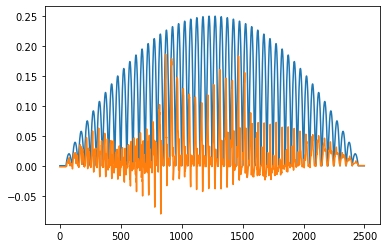

In [33]:
plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

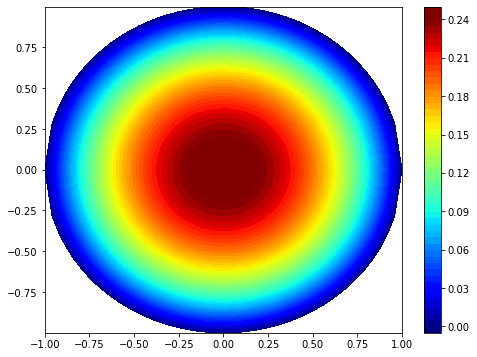

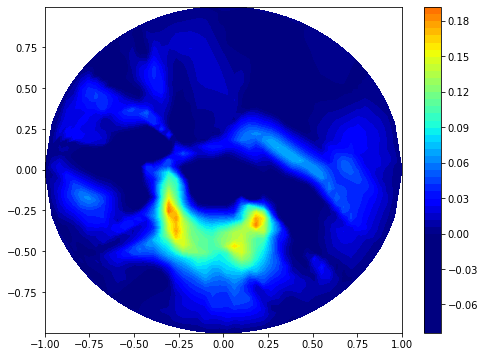

In [34]:
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [35]:
iteration = 1001
n1 = 10
n2 = 10

prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u, prediction_v)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u = net_u(x_test_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u,prediction_v)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v = net_v(x_test_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(55.7882, grad_fn=<AddBackward0>) tensor(-55.7940, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(55.9569, grad_fn=<AddBackward0>) tensor(-55.9705, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(56.1531, grad_fn=<AddBackward0>) tensor(-56.1690, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(56.3812, grad_fn=<AddBackward0>) tensor(-56.4014, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(56.6699, grad_fn=<AddBackward0>) tensor(-56.6971, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(57.0555, grad_fn=<AddBackward0>) tensor(-57.0956, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(57.8350, grad_fn=<AddBackward0>) tensor(-57.9936, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(58.0951, grad_fn=<AddBackward0>) tensor(-58.1674, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

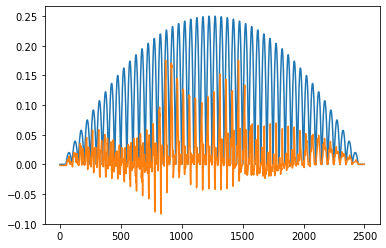

In [36]:
plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

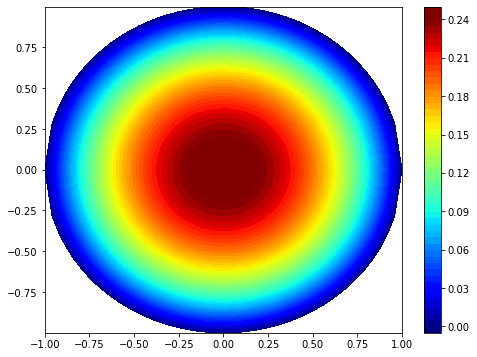

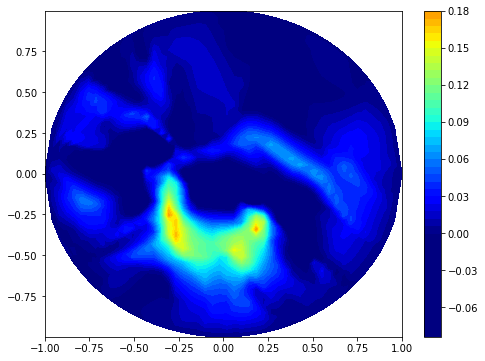

In [37]:
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()